# Benchmarking `nvjpeg` 📊

In [ ]:
%run benchmark_nvjpeg_LoLa.py

# 📈 Data Visualization & Analysis

Now we will plot the collected data to understand the results. We will focus on:
1.  **Rate-Distortion:** How do quality metrics (like VMAF) change with file size?
2.  **Quality vs. File Size:** How does the `-quality` setting impact file size for different subsampling methods?
3.  **Encoding Performance:** Which Format method is fastest? How does resolution affect encoding time?
4.  **Decoding Performance:** How does resolution affect decoding time?

In [1]:
# --- Main Configuration ---
# Resolutions to test (Name: (Width, Height))
RESOLUTIONS = {
    '1280x720': (1280, 720),
    '1920x1080': (1920, 1080),
    '3840x2160': (3840, 2160),
}

RESOLUTION_TO_FILENAME = {
    '1280x720': 'frame_hd.rgb',
    '1920x1080': 'frame_fullhd.rgb',
    '3840x2160': 'frame_ultrahd.rgb',
}

# Parameters to benchmark
QUALITIES = range(10, 101, 1)
SUBSAMPLINGS = ['4:4:4', '4:2:2', '4:2:0']

SUBSAMPLING_TO_PARAM = {
    '4:4:4': '444',
    '4:2:2': '422',
    '4:2:0': '420'
}

In [2]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('results_nvjpeg_complete.csv')
df.head()

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
0,1280x720,10,4:4:4,10,0.000250,0.144223,0.000007,0.000801,0.112770,0.001966,47.241,27.878918,0.796885,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
1,1280x720,10,4:2:2,10,0.000165,0.114861,0.000005,0.000603,0.108308,0.000828,39.696,27.727669,0.795833,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
2,1280x720,10,4:2:0,10,0.000150,0.109302,0.000006,0.000524,0.106096,0.000654,36.314,27.585447,0.795781,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
3,1280x720,20,4:4:4,10,0.000204,0.109364,0.000006,0.000984,0.104713,0.001135,67.020,30.552410,0.867007,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
4,1280x720,20,4:2:2,10,0.000195,0.114929,0.000005,0.000790,0.105149,0.000804,58.633,30.216013,0.864293,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [4]:
# Set plot style
sns.set_theme(style="whitegrid")

## Encoding Parameters vs. quality metrics

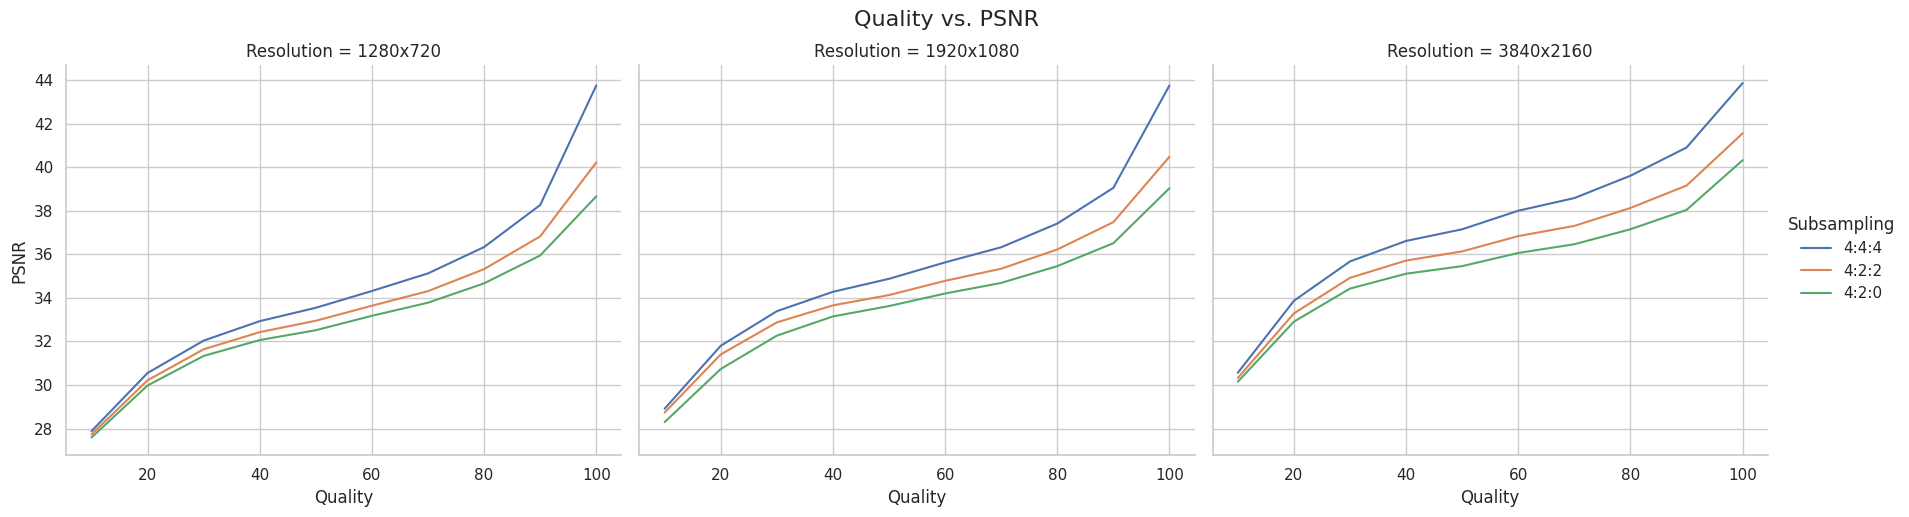

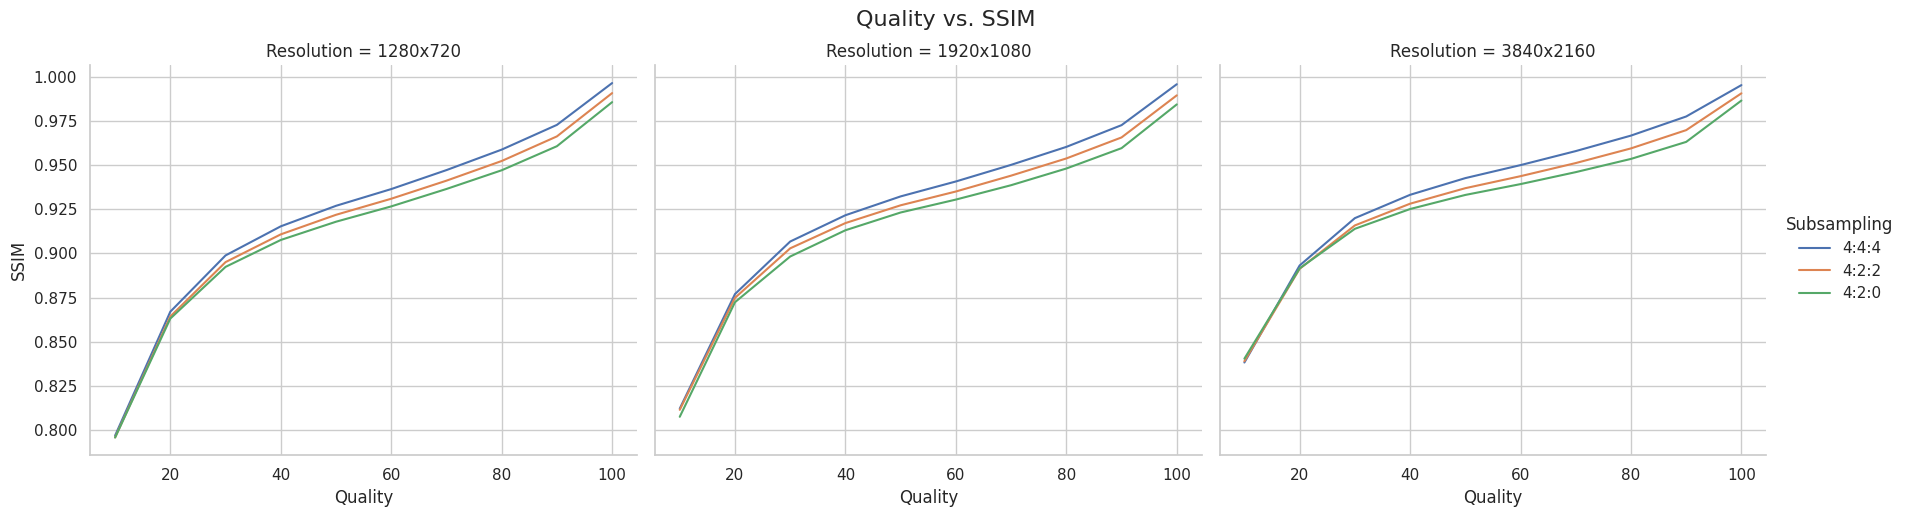

In [5]:
x = 'Quality'
y = 'PSNR'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

x = 'Quality'
y = 'SSIM'

g = sns.relplot(
    data=df,
    x=x,
    y=y,
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharex': False}
)

g.figure.suptitle(f'{x} vs. {y}', y=1.03, fontsize=16)
g.set_axis_labels(x, y)
plt.show()

## Encoding Parameters vs. File Size


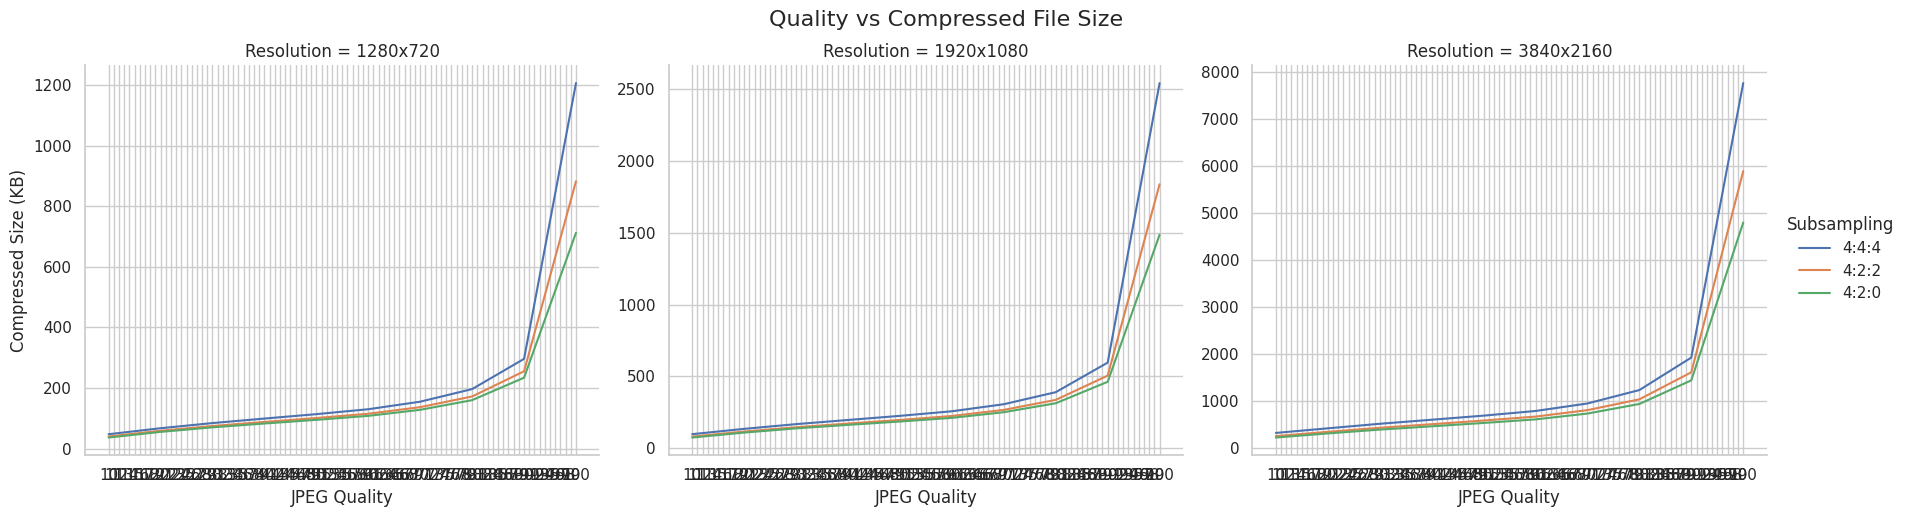

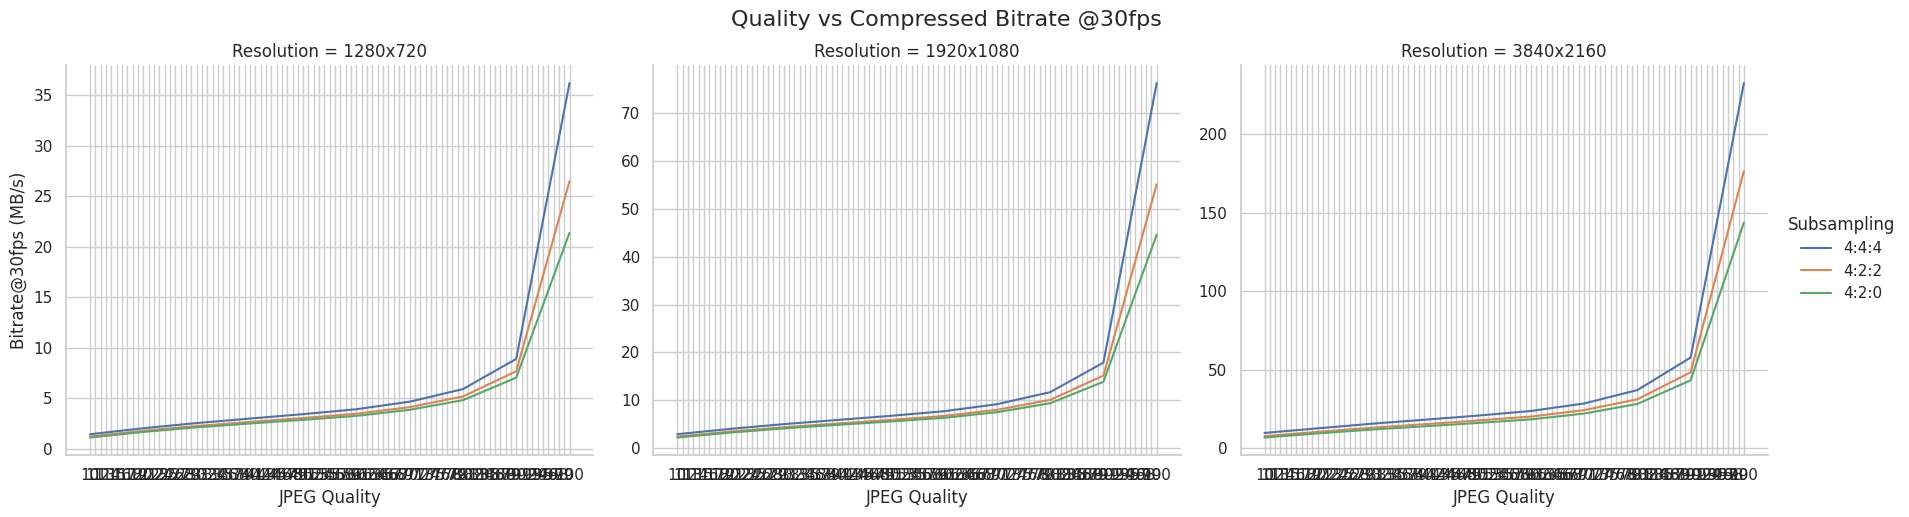

In [6]:
g = sns.relplot(
    data=df,
    x='Quality',
    y='Compressed Size (KB)',
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Compressed File Size', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Compressed Size (KB)')
g.set(xticks=QUALITIES)
plt.show()

fps = 30
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Compressed Size (KB)'] * fps / 1000,
    hue='Subsampling',
    col='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    col_order=RESOLUTIONS.keys(),
    facet_kws={'sharey': False},
)
g.figure.suptitle(f'Quality vs Compressed Bitrate @{fps}fps', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', f'Bitrate@{fps}fps (MB/s)')
g.set(xticks=QUALITIES)
plt.show()

We can observe an explosion in file size from quality 95 onwards, and a sharp increase from quality 90 onwards.

## Encoding Parameters vs. Performance

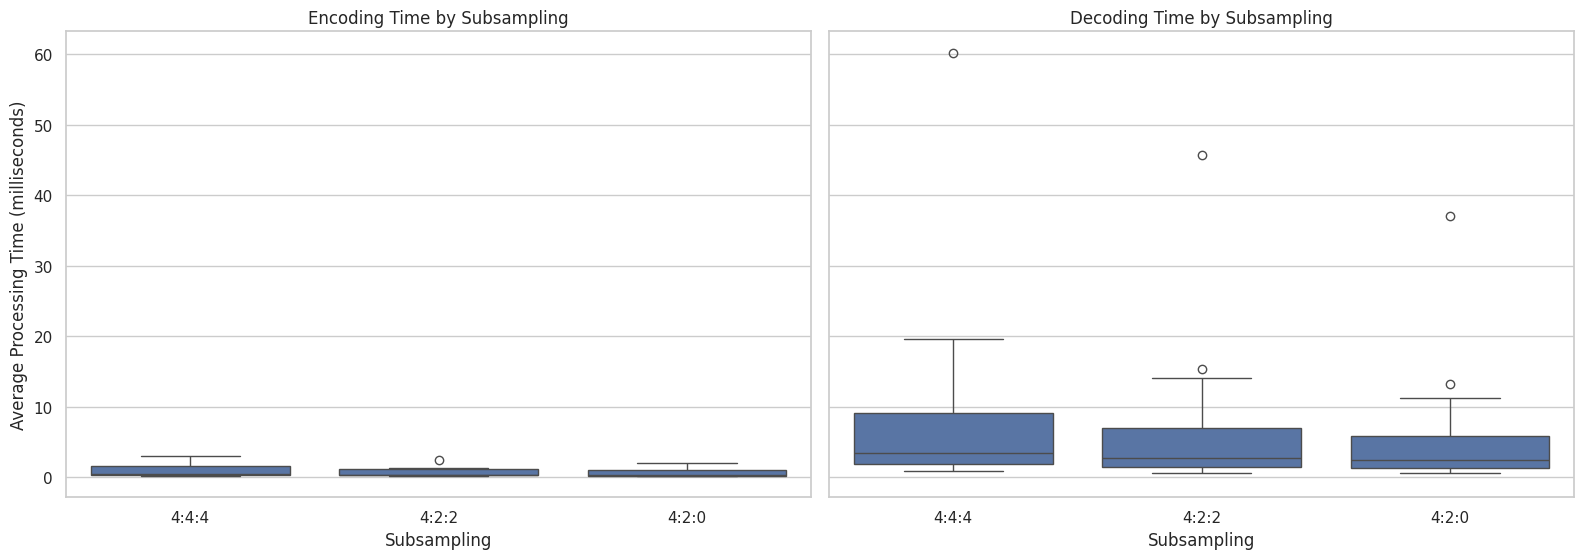

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
# Plot #1: Encoding time by Subsampling method
sns.boxplot(
    data=df,
    x='Subsampling',
    y=df['Avg Encode Time (s)'] * 1000,
    order=SUBSAMPLINGS,
    ax=ax[0]
)
ax[0].set_title('Encoding Time by Subsampling')
ax[0].set_ylabel('Average Processing Time (milliseconds)')

# Plot #2: Decoding time by Subsampling method
sns.boxplot(
    data=df,
    x='Subsampling',
    y=df['Avg Decode Time (s)'] * 1000,
    order=SUBSAMPLINGS,
    ax=ax[1]
)
ax[1].set_title('Decoding Time by Subsampling')
plt.tight_layout(rect=[0.0, 0.0, 1.0, 0.96])
plt.show()

In [8]:
df = df[df['Subsampling'] == '4:2:0']

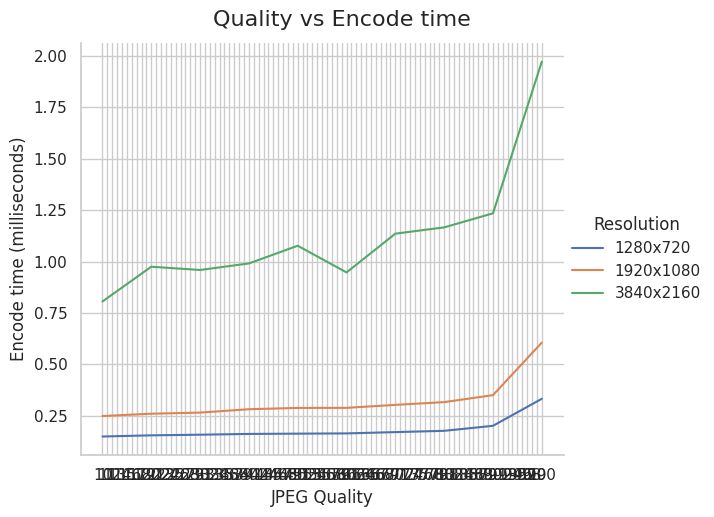

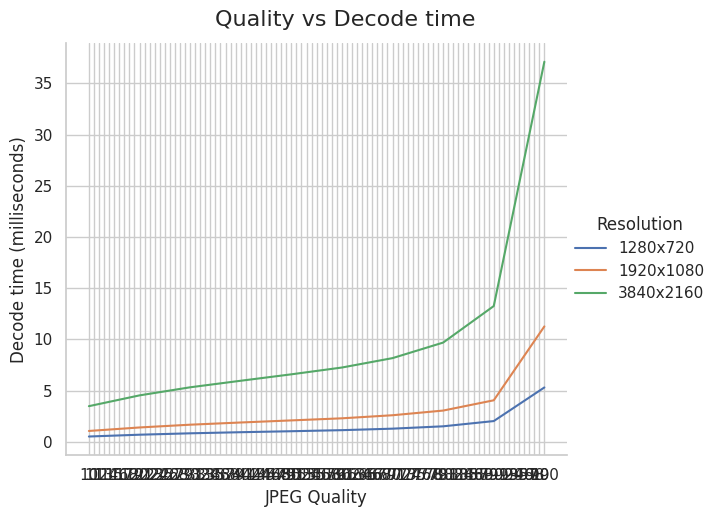

In [9]:
g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Encode Time (s)'] * 1000,
    hue='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Encode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Encode time (milliseconds)')
g.set(xticks=QUALITIES)
plt.show()

g = sns.relplot(
    data=df,
    x='Quality',
    y=df['Avg Decode Time (s)'] * 1000,
    hue='Resolution',
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False}
)
g.figure.suptitle('Quality vs Decode time', y=1.03, fontsize=16)
g.set_axis_labels('JPEG Quality', 'Decode time (milliseconds)')
g.set(xticks=QUALITIES)
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
plt.show()

In [10]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 2 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 2]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 2]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
26,1280x720,90,4:2:0,10,0.000202,0.113705,0.000006,0.002031,0.109058,0.000664,233.879,35.954357,0.960647,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
53,1920x1080,80,4:2:0,10,0.000317,0.113242,0.000007,0.003057,0.110833,0.001299,311.960,35.463619,0.948021,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
23,1280x720,80,4:2:0,10,0.000177,0.110689,0.000005,0.001520,0.105499,0.000639,159.676,34.672737,0.947032,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
50,1920x1080,70,4:2:0,10,0.000303,0.112773,0.000007,0.002600,0.110522,0.001303,249.489,34.693085,0.938580,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
20,1280x720,70,4:2:0,10,0.000171,0.114837,0.000006,0.001290,0.105900,0.000651,127.818,33.783844,0.936441,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [11]:
df[df['Resolution'] == '1920x1080'].sort_values(by='SSIM', ascending=False).head(5)


,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
53,1920x1080,80,4:2:0,10,0.000317,0.113242,0.000007,0.003057,0.110833,0.001299,311.960,35.463619,0.948021,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
50,1920x1080,70,4:2:0,10,0.000303,0.112773,0.000007,0.002600,0.110522,0.001303,249.489,34.693085,0.938580,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
47,1920x1080,60,4:2:0,10,0.000289,0.112026,0.000006,0.002300,0.113385,0.001299,210.189,34.205944,0.930445,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
44,1920x1080,50,4:2:0,10,0.000289,0.114024,0.000007,0.002096,0.105291,0.001343,184.704,33.629047,0.923139,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
41,1920x1080,40,4:2:0,10,0.000282,0.112750,0.000007,0.001893,0.107620,0.001356,161.242,33.152302,0.913080,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [12]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 1.5 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1.5]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
26,1280x720,90,4:2:0,10,0.000202,0.113705,0.000006,0.002031,0.109058,0.000664,233.879,35.954357,0.960647,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
23,1280x720,80,4:2:0,10,0.000177,0.110689,0.000005,0.001520,0.105499,0.000639,159.676,34.672737,0.947032,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
50,1920x1080,70,4:2:0,10,0.000303,0.112773,0.000007,0.002600,0.110522,0.001303,249.489,34.693085,0.938580,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
20,1280x720,70,4:2:0,10,0.000171,0.114837,0.000006,0.001290,0.105900,0.000651,127.818,33.783844,0.936441,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
47,1920x1080,60,4:2:0,10,0.000289,0.112026,0.000006,0.002300,0.113385,0.001299,210.189,34.205944,0.930445,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [13]:
df[df['Resolution'] == '1920x1080'].sort_values(by='SSIM', ascending=False).head(5)


,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
50,1920x1080,70,4:2:0,10,0.000303,0.112773,0.000007,0.002600,0.110522,0.001303,249.489,34.693085,0.938580,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
47,1920x1080,60,4:2:0,10,0.000289,0.112026,0.000006,0.002300,0.113385,0.001299,210.189,34.205944,0.930445,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
44,1920x1080,50,4:2:0,10,0.000289,0.114024,0.000007,0.002096,0.105291,0.001343,184.704,33.629047,0.923139,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
41,1920x1080,40,4:2:0,10,0.000282,0.112750,0.000007,0.001893,0.107620,0.001356,161.242,33.152302,0.913080,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
38,1920x1080,30,4:2:0,10,0.000266,0.110710,0.000007,0.001677,0.105776,0.001344,136.912,32.268105,0.898229,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [14]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 1 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 1]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 1]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
23,1280x720,80,4:2:0,10,0.000177,0.110689,0.000005,0.001520,0.105499,0.000639,159.676,34.672737,0.947032,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
20,1280x720,70,4:2:0,10,0.000171,0.114837,0.000006,0.001290,0.105900,0.000651,127.818,33.783844,0.936441,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
17,1280x720,60,4:2:0,10,0.000165,0.111322,0.000006,0.001143,0.105168,0.000630,107.829,33.181210,0.926587,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
14,1280x720,50,4:2:0,10,0.000163,0.113098,0.000006,0.001040,0.108798,0.000639,94.690,32.518944,0.917912,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
11,1280x720,40,4:2:0,10,0.000162,0.111336,0.000005,0.000944,0.109594,0.000645,82.585,32.065929,0.907584,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [15]:
df[df['Resolution'] == '1920x1080'].sort_values(by='SSIM', ascending=False).head(5)


,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
38,1920x1080,30,4:2:0,10,0.000266,0.110710,0.000007,0.001677,0.105776,0.001344,136.912,32.268105,0.898229,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
35,1920x1080,20,4:2:0,10,0.000260,0.114362,0.000007,0.001407,0.108597,0.001302,107.478,30.735981,0.872359,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
32,1920x1080,10,4:2:0,10,0.000249,0.116598,0.000006,0.001066,0.109267,0.001312,73.107,28.294464,0.807515,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...


In [16]:
df = df[df['Avg Encode Time (s)'] * 1000 + df['Avg Decode Time (s)'] * 1000 <= 0.5 * 2]
#df = df[df['Avg Encode Time (s)'] * 1000 <= 0.5]
#df = df[df['Avg Decode Time (s)'] * 1000 <= 0.5]
df.sort_values(by='SSIM', ascending=False).head(5)

,Resolution,Quality,Subsampling,Iterations,Avg Encode Time (s),Encoder Setup Time (s),Encoder Cleanup Time (s),Avg Decode Time (s),Decoder Setup Time (s),Decoder Cleanup Time (s),Compressed Size (KB),PSNR,SSIM,Encode CMD,Decode CMD
8,1280x720,30,4:2:0,10,0.000158,0.120678,0.000006,0.000836,0.108736,0.000641,69.973,31.336771,0.892357,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
5,1280x720,20,4:2:0,10,0.000155,0.111519,0.000006,0.000700,0.110429,0.000650,54.920,29.978191,0.863114,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
2,1280x720,10,4:2:0,10,0.000150,0.109302,0.000006,0.000524,0.106096,0.000654,36.314,27.585447,0.795781,/home/simone/Documenti/video-compression-laten...,/home/simone/Documenti/video-compression-laten...
